# Quantum plots (beta)

This notebook provides plotting functionality tailored for the use with the `quantumarticle` documentclass.

## Global routines

The parameters for the plots are set in a way that the font sizes in the resulting graphic match those in the surrounding document.

In [1]:
import numpy             as     np
import matplotlib        as     mpl
import matplotlib.pyplot as     plt
from   matplotlib        import rc
from   cycler            import cycler

_widths = {
    # a4paper columnwidth = 426.79135 pt = 5.93 in
    # letterpaper columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper columnwidth = 231.84843 pt = 3.22 in
    # letterpaper columnwidth = 240.24199 pt = 3.34 in
    'twocolumn': {
        'a4paper' : 3.22,
        'letterpaper' : 3.34
    }
}

_wide_widths = {
    # a4paper wide columnwidth = 426.79135 pt = 5.93 in
    # letterpaper wide columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper wide linewidth = 483.69687 pt = 6.72 in
    # letterpaper wide linewidth = 500.48400 pt = 6.95 in
    'twocolumn': {
        'a4paper' : 6.72,
        'letterpaper' : 6.95
    }
}

_fontsizes = {
    10 : {
        'tiny' : 5,
        'scriptsize' : 7,
        'footnotesize' : 8, 
        'small' : 9, 
        'normalsize' : 10,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' : 20,
        'Huge' : 25
    },
    11 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 9, 
        'small' : 10, 
        'normalsize' : 11,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' :  20,
        'Huge' :  25
    },
    12 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 10, 
        'small' : 11, 
        'normalsize' : 12,
        'large' : 14, 
        'Large' : 17, 
        'LARGE' : 20,
        'huge' :  25,
        'Huge' :  25
    }
}

_width         = 1
_wide_width    = 1
_quantumviolet = '#53257F'
_quantumgray   = '#555555'

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     columns : string = ('onecolumn' | 'twocolumn')
#         the columns you used to set up your quantumarticle, 
#         defaults to 'twocolumn'
#
#     paper : string = ('a4paper' | 'letterpaper')
#         the paper size you used to set up your quantumarticle,
#         defaults to 'a4paper'
#
#     fontsize : int = (10 | 11 | 12)
#         the fontsize you used to set up your quantumarticle as int
#
#     (returns) : dict
#         parameters that can be used for plot adjustments

def global_setup(columns = 'twocolumn', paper = 'a4paper', fontsize = 10):
    plt.rcdefaults()
        
    # Seaborn white is a good base style
    plt.style.use(['seaborn-white', './quantum-plots.mplstyle'])
    
    try:        
        # This hackery is necessary so that jupyther shows the plots
        mpl.use("pgf")
        %matplotlib inline
        plt.plot()
        mpl.use("pgf")
    except:
        print('Call to matplotlib.use had no effect')
        
    mpl.interactive(False) 
    
    # Now prepare the styling that depends on the settings of the document
    
    global _width 
    _width = _widths[columns][paper]
    
    global _wide_width 
    _wide_width = _wide_widths[columns][paper]
    
    # Use the default fontsize scaling of LaTeX
    global _fontsizes
    fontsizes = _fontsizes[fontsize]
    
    plt.rcParams['axes.labelsize'] = fontsizes['small']
    plt.rcParams['axes.titlesize'] = fontsizes['large']
    plt.rcParams['xtick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['ytick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['font.size'] = fontsizes['small']
    
    return {
        'fontsizes' : fontsizes,
        'colors' : {
            'quantumviolet' : _quantumviolet,
            'quantumgray' : _quantumgray
        }
        }
    

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     aspect_ratio : float
#         the aspect ratio (width/height) of your plot
#         defaults to the golden ratio
#
#     width_ratio : float in [0, 1]
#         the width of your plot when you insert it into the document, e.g.
#         .8 of the regular width
#
#     wide : bool 
#         indicates if the figures spans two columns in twocolumn mode, i.e.
#         when the figure* environment is used, has no effect in onecolumn mode 
#
#     (returns) : matplotlib figure object
#         the initialized figure object

def plot_setup(aspect_ratio = 1/1.62, width_ratio = 1.0, wide = False):
    width = (_wide_width if wide else _width) * width_ratio
    height = width * aspect_ratio
           
    return plt.figure(figsize=(width,height), dpi=120, facecolor='white')
    
print('Success')

Success


## Examples

When setting up your plots you have to call `global_setup` once and set the global options of your `quantumarticle`

In [2]:
props = global_setup(columns = 'twocolumn', paper = 'a4paper', fontsize = 11)

print('Global props:')
for key in props:
    print(key, ':')
    for subkey in props[key]:
        print('    ', subkey, ': ', props[key][subkey])

Global props:
fontsizes :
     tiny :  6
     scriptsize :  8
     footnotesize :  9
     small :  10
     normalsize :  11
     large :  12
     Large :  14
     LARGE :  17
     huge :  20
     Huge :  25
colors :
     quantumviolet :  #53257F
     quantumgray :  #555555


We recommend that you use `tight_layout()` on your plots. Plots should _always_ be saved as __pdf__ files (`plt.savefig('filename.pdf')`). This will result in the highest quality graphics that can seamlessly integrated in your publications. 

**Attention:** sometimes, the notebook does not display the generated figures. In this case, add `%matplotlib inline` to a cell that does create a plot, run the cell, remove the `%matplotlib inline` and rerun `global_setup`

### Lineplot

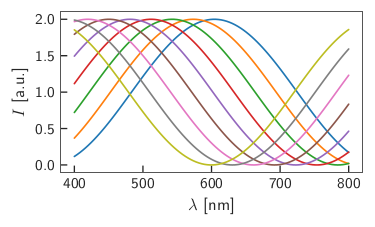

In [3]:
x = np.linspace(400, 800, 100)

fig = plot_setup()

for i in range(9):
    y = 1+np.sin(.013*x+.4*i)
    plt.plot(x, y)
    
plt.xlabel('$\\lambda$ [nm]')
plt.ylabel('$I$ [a.u.]')
plt.tight_layout()

### Data plot

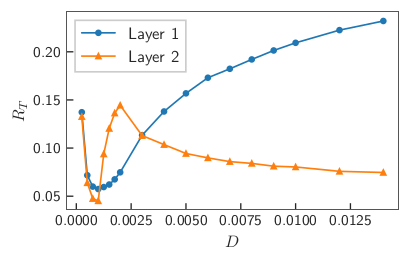

In [4]:
Ds = np.concatenate([np.arange(0.00025,0.0021,0.00025) , np.arange(0.003,0.011, 0.001) , [0.012,0.014]])

RT1 = [0.137244, 0.0717596, 0.0599749, 0.0574315, 0.0594974, 0.0621222, 0.0674902, 0.0747963, 0.113289, 0.138015, 0.156837, 0.173086, 0.182361, 0.19209, 0.201404, 0.20936, 0.222541, 0.232029] 
RT1_std = [0.00630981, 0.0042112, 0.00442357, 0.00430778, 0.00682198, 0.00924101, 0.0120358, 0.0153502, 0.017939, 0.0175116, 0.0177625, 0.0170304, 0.0172532, 0.0178392, 0.0173897, 0.0186951, 0.0197251, 0.019896]
RT2 = [0.132671, 0.0638861, 0.0475232, 0.0451378, 0.093839, 0.120379, 0.136352, 0.144436, 0.112958, 0.103575, 0.0943459, 0.0897908, 0.0859248, 0.0840781, 0.0811686, 0.0803692, 0.0758179, 0.0746361]
RT2_std = [0.00627376, 0.00379742, 0.0040468, 0.00790347, 0.016209, 0.00974721, 0.0136891, 0.0126009, 0.0108238, 0.00789612, 0.00453309, 0.00640408, 0.00607691, 0.00590591, 0.00551176, 0.00594776, 0.00389493, 0.00461693]

fig = plot_setup()
R1, = plt.plot(Ds, RT1, marker = 'o')
R2, = plt.plot(Ds, RT2, marker = '^')

plt.xlabel('$D$')
plt.ylabel('$R_T$')

plt.legend([R1, R2], ['Layer 1', 'Layer 2'])
plt.tight_layout(pad = 0.0)

### TeX decorations and annotations

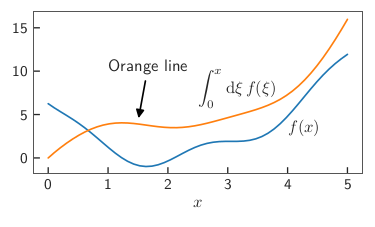

In [5]:
x = np.linspace(0, 5, 50)
f = (x-1)**2 - x + 0.25 + np.sin(3*x) + 5 * np.exp(-x)
F = (x-1)**3/3. - x**2/2 + 0.25*x + 1/3. - 1/3. * (np.cos(3*x)-1) - 5 * np.exp(-x) + 5

fig = plot_setup()

plt.plot(x, f)
plt.plot(x, F)

plt.text(4,3,'$f(x)$')
plt.text(2.5,7.5, r'$\int_0^x \mathrm{d}\xi \, f(\xi)$')
plt.annotate('Orange line', 
             xy=(1.5, 4.2), 
             xytext=(1, 10), 
             arrowprops=dict(facecolor='black', arrowstyle='-|>'))
plt.xlabel('$x$')
plt.tight_layout()

## Spectrum

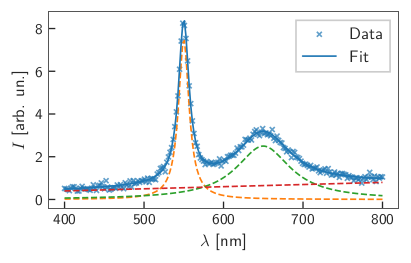

In [6]:
# Generate dummy spectral data
x = np.linspace(400, 800, 200)
y = 30 / (4 + ((x-550)/4)**2) + 30 / (12 + ((x-650)/12)**2) + .001*x + np.random.normal(0,.1, 200)

fig = plot_setup()

# plot data
data = plt.scatter(x,y, color = 'C0', alpha = 0.7, marker = 'x')

# plot fits
y_fit1 = 30 / (4 + ((x-550)/4)**2)
plt.plot(x, y_fit1, color = 'C1', ls = '--')

y_fit2 = 30 / (12 + ((x-650)/12)**2)
plt.plot(x, y_fit2, color = 'C2', ls = '--')

y_fit3 = .001*x
plt.plot(x, y_fit3, color = 'C3', ls = '--')

y_fit = y_fit1 + y_fit2 + y_fit3
fit, = plt.plot(x, y_fit, color = 'C0')

plt.xlabel('$\\lambda$ [nm]')
plt.ylabel('$I$ [arb. un.]')
plt.legend([data, fit], ['Data', 'Fit'])
plt.tight_layout(pad = 0.0)

### Scatter plot

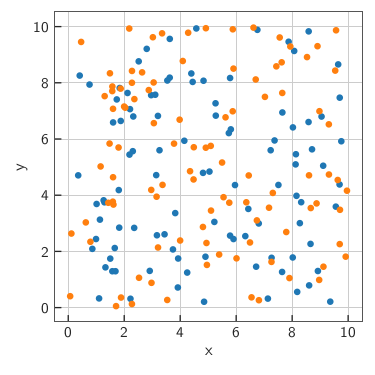

In [7]:
fig = plot_setup(aspect_ratio = 1.0)

for i in range(2):
    x = np.random.uniform(0,10,100)
    y = np.random.uniform(0,10,100)
    plt.scatter(x, y)
    
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.tight_layout()

### Contour plot

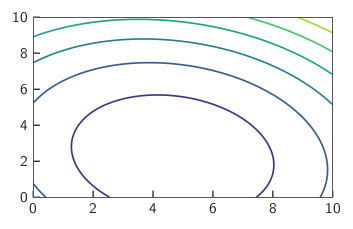

In [8]:
fig = plot_setup()

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

Z = (X-5)**2 + (Y-3)**2 + .3 * X * Y

plt.contour(X, Y, Z, cmap = 'viridis')

### Colormesh

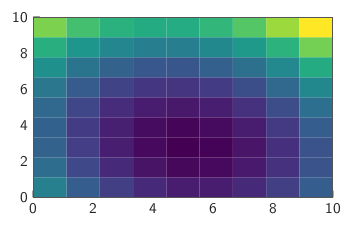

In [9]:
fig = plot_setup()

x = np.linspace(0, 10, 10)
y = np.linspace(0, 10, 10)
X, Y = np.meshgrid(x, y)

Z = (X-5)**2 + (Y-3)**2 + .3 * X * Y

plt.pcolormesh(X, Y, Z, cmap = 'viridis')

### Multiple Plots

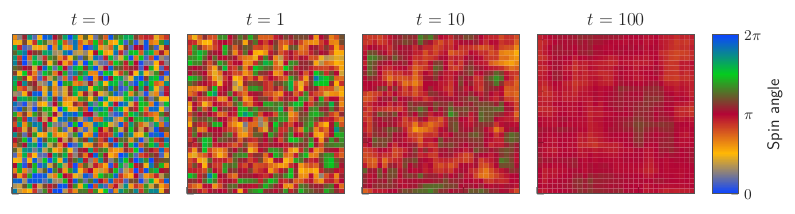

In [10]:
import scipy.ndimage

# Create a custom cyclic colormap
cdict = {'red':   ((0.0,  0.05, 0.05),
                   (0.25,  1.0, 1.0),
                   (0.5,  0.7, 0.7),
                   (0.75,  0.02, 0.02),
                   (1.0,  0.05, 0.05)),
         'green': ((0.0,  0.27, 0.27),
                   (0.25,  0.72, 0.72),
                   (0.5,  0.02, 0.02),
                   (0.75,  0.80, 0.80),
                   (1.0,  0.27, 0.27)),
         'blue':  ((0.0,  1.0, 1.0),
                   (0.25,  0.02, 0.02),
                   (0.5,  0.21, 0.21),
                   (0.75,  0.12, 0.12),
                   (1.0,  1.0, 1.0))}

my_colormap = mpl.colors.LinearSegmentedColormap('mycolormap', cdict)


# Make plotting reusable
def plot_array(arr, label):
    ax_ = plt.gca()
    X, Y = np.meshgrid(range(arr.shape[0]), range(arr.shape[1]), indexing='ij')
    plt.setp(ax_.get_yticklabels(), visible=False)
    plt.setp(ax_.get_xticklabels(), visible=False)     
    
    im = plt.pcolormesh(X, Y, arr, vmin=0.0, vmax = 2*np.pi, cmap=my_colormap)
    
    ax_.axis([X.min(), X.max(), Y.min(), Y.max()])
    
    # Reduce title fontsize -- it is important to use props here as they guarantee
    # that the fontsize fits well with the surrounding document
    plt.title(label, fontdict = {'fontsize' : props['fontsizes']['normalsize']})
    
    return im

dummy_data = np.random.uniform(0.0, 2 * np.pi, (4,32,32))
dummy_data[1] = scipy.ndimage.uniform_filter(dummy_data[0], size=2, mode='wrap')
dummy_data[2] = scipy.ndimage.uniform_filter(dummy_data[0], size=4, mode='wrap')
dummy_data[3] = scipy.ndimage.uniform_filter(dummy_data[0], size=9, mode='wrap')

fig = plot_setup(aspect_ratio = 0.28, wide = True)
    
ax1 = plt.subplot2grid((1,17), (0,0), colspan=4)
ax2 = plt.subplot2grid((1,17), (0,4), colspan=4)
ax3 = plt.subplot2grid((1,17), (0,8), colspan=4)
ax4 = plt.subplot2grid((1,17), (0,12), colspan=4)
ax5 = plt.subplot2grid((1,17), (0,16))

for (ax_, title_, idx_) in [(ax1, '$t = 0$', 0), (ax2, '$t = 1$', 1), (ax3, '$t = 10$', 2), (ax4, '$t = 100$', 3)]:
    plt.sca(ax_)
    im = plot_array(dummy_data[idx_,:,:], title_)      

norm = mpl.colors.Normalize(vmin=0, vmax=2*np.pi)
cb1 = mpl.colorbar.ColorbarBase(ax5, cmap=my_colormap,
                                norm=norm,
                                ticks=[0, np.pi, 2*np.pi],
                                orientation='vertical')
cb1.ax.set_yticklabels(['$0$', '$\\pi$', '$2 \\pi$'])
cb1.set_label('Spin angle')
plt.tight_layout()